# End to End Machine Learning Project

<ol>
    <li>Look at the Bigger Picture</li>
    <li>Get the data</li>
    <li>Discover and Visualize the data</li>
    <li>Prepare the date for Machine Learning algorithms</li>
    <li>Select a model and train it</li>
    <li>Fine tune your model</li>
    <li>Present your solution</li>
    <li>Launch, monitor, and maintain your system</li>
</ol>

In [239]:
# Import the packages

#Pandas to load the data
import pandas as pd

#OS to perfrom OS operation
import os

#Matplotlib for plots
# only in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Numpy
import numpy as np

import hashlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [240]:
# Write a function to read the data
def load_data(directory,file_name):
    '''
    This function will load the data
    by joining the data_path and file_name parameter as a valid path
    '''
    try:
        data_path = os.path.join(directory,file_name)
        print('Loading {0} from path {1}'.format(file_name,data_path))
        return pd.read_csv(data_path)
    except IOError:
        print("File {0} does not exist".format(data_path))
    except:
        print("Some other Error")

In [241]:
housing = load_data('datasets','housing.csv')

Loading housing.csv from path datasets/housing.csv


In [242]:
housing.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [243]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [244]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [245]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


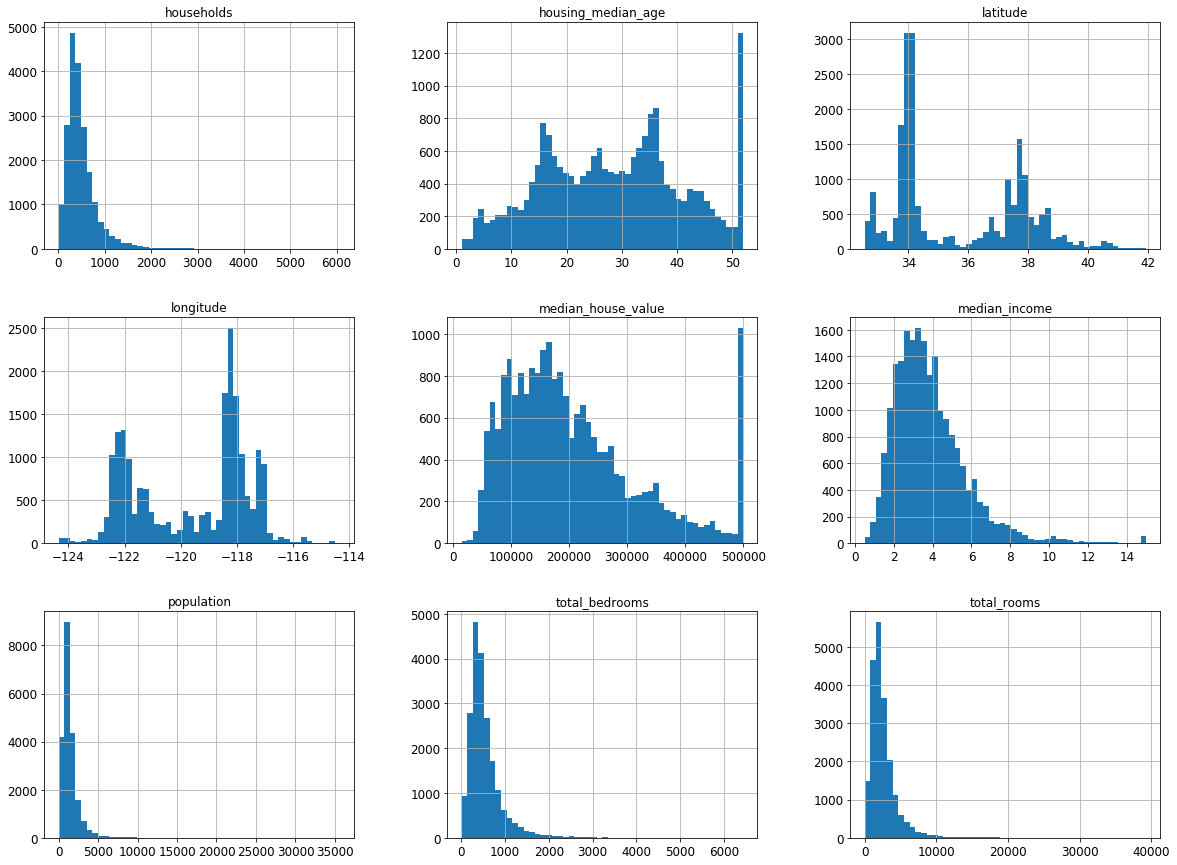

In [246]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

In [247]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # Shuffle the indices
    test_set_size = int(len(data) * test_ratio) # size of test set
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [248]:
train_set,test_set = split_train_test(housing,0.2)

In [249]:
print("{0} length of train set, {1} length of test set".format(len(train_set), len(test_set)))

16512 length of train set, 4128 length of test set


In [250]:
housing_with_id = housing.reset_index()

In [251]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [252]:
def split_train_test_by_id(data, test_ratio, id_coloumn, hash = hashlib.md5):
    ids = data[id_coloumn]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [253]:
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [254]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"id")

In [255]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd91a4cd6d0>]],
      dtype=object)

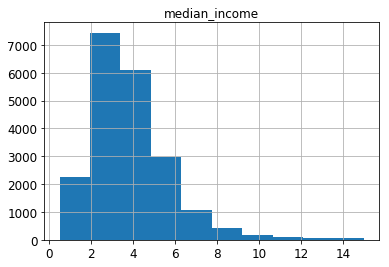

In [256]:
housing.hist(column="median_income")

In [257]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

In [258]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

In [259]:
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [260]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [261]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [262]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [263]:
#Now remove the income_cat attribute 
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace = True)

## Discover and Visualize the Data to Gain Insights

In [264]:
housing = strat_train_set.copy() # Copy the training set

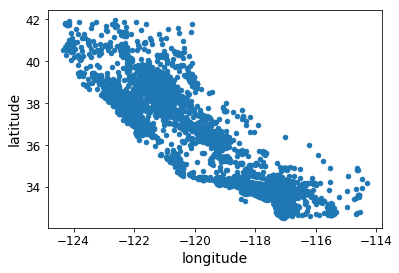

In [265]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

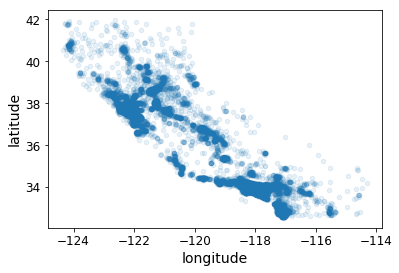

In [266]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

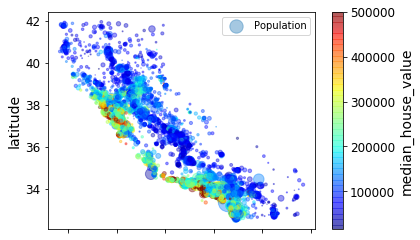

In [267]:
#The radius of the circle will represent the population density
# The colour represents the price
housing.plot(kind = "scatter", x = "longitude", y="latitude", alpha = 0.4, s = housing["population"]/100,
            label = "Population", c = "median_house_value", cmap = plt.get_cmap("jet"),
            colorbar=True,)
plt.legend()

## Looking for Correlations


In [268]:
corr_matrix = housing.corr()

In [269]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [270]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd919e1bc50>,
      dtype=object)

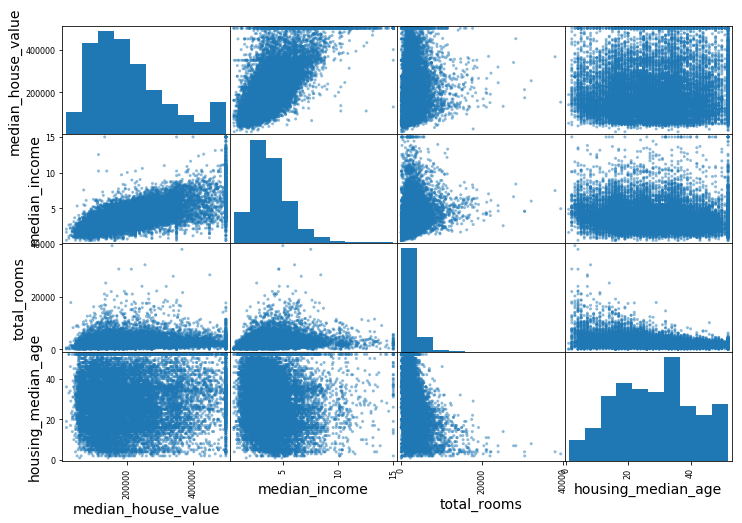

In [271]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

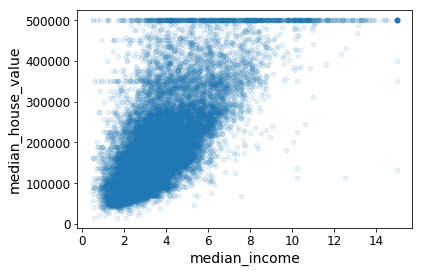

In [272]:
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha = 0.1)

In [273]:
#Experimenting with Attribute Combination
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [274]:
corr_matrix = housing.corr()

In [275]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare Data for Machine Learning

In [276]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [277]:

#Get rid if corresponding row
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [278]:
#Get rid of whole attribute
housing.drop("total_bedrooms",axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,1448.0,570.0,3.5395,INLAND
8879,-118.50,34.04,52.0,2233.0,769.0,277.0,8.3839,<1H OCEAN
13685,-117.24,34.15,26.0,2041.0,936.0,375.0,6.0000,INLAND
4937,-118.26,33.99,47.0,1865.0,1916.0,438.0,1.8242,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,2690.0,217.0,0.4999,<1H OCEAN


In [279]:
#Set the value to some value for eg Median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [280]:
from sklearn.preprocessing import Imputer

In [281]:
imputer  = Imputer(strategy="median")

In [282]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [283]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [284]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [285]:
X = imputer.transform(housing_num)

### Handling Text and Categorical Attributes

In [286]:
from sklearn.preprocessing import LabelEncoder

In [287]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [288]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [289]:
#OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

In [290]:
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<type 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [291]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [292]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=False)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transformer

In [293]:
from sklearn.base import BaseEstimator, TransformerMixin

In [294]:
room_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

In [295]:
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    '''
    Class to add the extra attributes
    '''
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y=None):
        rooms_per_households = X[:, room_ix]/ X[:, households_ix]
        population_per_households = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, room_ix]
            return np.c_[X, rooms_per_households, population_per_households, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_households, population_per_households]
    

In [296]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
std_scaler = StandardScaler()

In [299]:
X = std_scaler.fit_transform(X)

### Transformation Pipelines

In [300]:
from sklearn.pipeline import Pipeline

In [301]:
# Pipeline for Numerical attribute
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [302]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [303]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [455]:
class MyLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelBinarizer()
    def fit(self,x,y = 0):
        self.encoder.fit(x)
        return self
    def transform(self,x,y=0):
        return self.encoder.transform(x)

    

In [456]:
# Pipeline for Categorical attribute
cat_pipeline = Pipeline([
    ("label_binarizer",MyLabelBinarizer())
])

In [446]:
housing_cat_tr = cat_pipeline.fit_transform(housing_cat)

In [447]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [448]:
# Combining the Two Pipeline
from sklearn.pipeline import FeatureUnion

In [449]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [457]:
# Pipeline for Numerical attribute
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Pipeline for Categorical attribute
cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("label_binarizer",MyLabelBinarizer())
])

In [458]:
# Combine the two pipeline
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [437]:
housing_prepared = full_pipeline.fit_transform(housing)

In [438]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

## Select and Train a Model

### Training and Evaluating on the Training Set

In [314]:
from sklearn.linear_model import LinearRegression

In [315]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [316]:
# Test the linear regression model on few instance of training set

some_data = housing.iloc[:5]
some_label = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #Only call transform not fit_transform
some_data_prepared.shape

(5, 16)

In [317]:
print('Prediction: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_label))

('Prediction: ', array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879]))
('Labels: ', [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])


In [318]:
# RMSE
from sklearn.metrics import mean_squared_error

In [319]:
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

#### The Linear Regression model is Undefitting the data

In [320]:
# Decision Regressor
from sklearn.tree import DecisionTreeRegressor

In [321]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_prediction = tree_reg.predict(housing_prepared)


In [322]:
tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### The Decision Tree Regressor Overfitting the Training data

### Better Evaluation using Cross-Validation

In [323]:
from sklearn.model_selection import cross_val_score

In [324]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)


In [325]:
rmse_scores = np.sqrt(-scores)


In [326]:
def display(scores):
    print('Score', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

In [327]:
display(rmse_scores)

('Score', array([68910.75832284, 65752.98411218, 69941.50713552, 69428.81491279,
       71714.93740362, 75183.27794084, 71108.54775495, 69640.76581048,
       76059.65363055, 71095.19869137]))
('Mean', 70883.64457151486)
('Standard Deviation', 2843.046922722685)


In [328]:
# Let's perform cross-validation in Linear Regression Model
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
display(rmse_scores)

('Score', array([66782.73843989, 66960.118071  , 70347.95244419, 74739.57052552,
       68031.13388938, 71193.84183426, 64969.63056405, 68281.61137997,
       71552.91566558, 67665.10082067]))
('Mean', 69052.46136345083)
('Standard Deviation', 2731.674001798348)


In [329]:
# Train a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

In [330]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [331]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22269.751499778864

In [332]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_score = np.sqrt(-scores)
display(rmse_score)

('Score', array([52051.64818671, 50018.30103149, 52860.04230279, 54396.93142533,
       53148.75232989, 55423.67201534, 50876.52497782, 49795.93437853,
       55627.76428548, 52572.57723394]))
('Mean', 52677.21481673261)
('Standard Deviation', 1961.589509821891)


### Save the Model

In [333]:
from sklearn.externals import joblib

In [334]:
# Saving the model
joblib.dump(forest_reg, "forest.pkl")

['forest.pkl']

In [335]:
# Retrieving the Model
my_model = joblib.load("forest.pkl")

## Fine Tune your Model

In [336]:
from sklearn.model_selection import GridSearchCV

In [337]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
{'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [338]:
forest_reg = RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error")

In [339]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [340]:
# To get the best set of hyperparameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [341]:
# To get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [342]:
# To get the evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

(63709.49860257693, {'max_features': 2, 'n_estimators': 3})
(55253.75239872581, {'max_features': 2, 'n_estimators': 10})
(52586.25519902159, {'max_features': 2, 'n_estimators': 30})
(60983.2282521575, {'max_features': 4, 'n_estimators': 3})
(53098.643770032126, {'max_features': 4, 'n_estimators': 10})
(50617.939117941154, {'max_features': 4, 'n_estimators': 30})
(59328.83851595149, {'max_features': 6, 'n_estimators': 3})
(52146.48960790066, {'max_features': 6, 'n_estimators': 10})
(49944.057710234156, {'max_features': 6, 'n_estimators': 30})
(58810.918205788366, {'max_features': 8, 'n_estimators': 3})
(51897.72960721771, {'max_features': 8, 'n_estimators': 10})
(49839.90489246329, {'max_features': 8, 'n_estimators': 30})
(63116.414892213994, {'max_features': 2, 'n_estimators': 3, 'bootstrap': False})
(54477.76032748178, {'max_features': 2, 'n_estimators': 10, 'bootstrap': False})
(60599.8810129368, {'max_features': 3, 'n_estimators': 3, 'bootstrap': False})
(52495.401574516145, {'max_f

In [343]:
# Analyze the Best Models and Their Errors
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([6.47420551e-02, 5.97376577e-02, 4.57017668e-02, 1.70310048e-02,
       1.45794067e-02, 1.66577321e-02, 1.43358914e-02, 3.82412613e-01,
       6.12298300e-02, 1.11936779e-01, 4.34505646e-02, 6.05182790e-03,
       1.57337433e-01, 7.53136384e-05, 1.50615005e-03, 3.21397463e-03])

In [344]:
extra_attribs = ["rooms_per_household","population_per_household","bedrooms_per_room"]
cat_one_hot_attributes = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attributes

In [345]:
sorted(zip(feature_importance, attributes), reverse = True)

[(0.3824126125358911, 'median_income'),
 (0.15733743305044584, 'INLAND'),
 (0.11193677889549244, 'population_per_household'),
 (0.0647420550983966, 'longitude'),
 (0.06122983003258138, 'rooms_per_household'),
 (0.059737657746583676, 'latitude'),
 (0.04570176678792316, 'housing_median_age'),
 (0.04345056462540589, 'bedrooms_per_room'),
 (0.017031004782885897, 'total_rooms'),
 (0.016657732132181215, 'population'),
 (0.014579406685364484, 'total_bedrooms'),
 (0.014335891400978951, 'households'),
 (0.006051827898279783, '<1H OCEAN'),
 (0.00321397463484081, 'NEAR OCEAN'),
 (0.0015061500543564273, 'NEAR BAY'),
 (7.531363839231269e-05, 'ISLAND')]

### Evaluate your system on Test Set

In [346]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"]

In [347]:
X_test_prepared = full_pipeline.transform(X_test)


In [348]:
final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

48410.83892607373

# Exercises

1. Try	a	Support	Vector	Machine	regressor	( sklearn.svm.SVR ),	with	various	hyperparameters
 such	as	 kernel="linear" 	(with	various	values	for	the	 C 	hyperparameter)	or	 kernel="rbf"
 (with	various	values	for	the	 C 	and	 gamma 	hyperparameters).	Don’t	worry	about	what	these
 hyperparameters	mean	for	now.	How	does	the	best	 SVR 	predictor	perform?
2. Try	adding	a	transformer	in	the	preparation	pipeline	to	select	only	the	most	important	attributes.
3. Try	creating	a	single	pipeline	that	does	the	full	data	preparation	plus	the	final	prediction.
4. Automatically	explore	some	preparation	options	using	 GridSearchCV .

# 1.

In [349]:
from sklearn.svm import SVR

In [351]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 300.,10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.,1000.0],
         'gamma': [0.01, 0.03, 3.0]},
    ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] kernel=linear, C=10.0 ...........................................
[CV] kernel=linear, C=10.0 ...........................................
[CV] kernel=linear, C=30.0 ...........................................
[CV] kernel=linear, C=30.0 ...........................................
[CV] ............................ kernel=linear, C=30.0, total=  13.5s
[CV] kernel=linear, C=300.0 ..........................................
[CV] ............................ kernel=linear, C=10.0, total=  13.7s
[CV] kernel=linear, C=300.0 ..........................................
[CV] ............................ kernel=linear, C=10.0, total=  13.9s
[CV] kernel=linear, C=10000.0 ........................................
[CV] ............................ kernel=linear, C=30.0, total=  13.6s
[CV] kernel=linear, C=10000.0 ........................................
[CV] ........................... kernel=linear, C=300.0, total=  13.2s
[CV] kernel=line

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.3min


[CV] .................... kernel=rbf, C=30.0, gamma=3.0, total=  22.3s
[CV] kernel=rbf, C=1000.0, gamma=0.03 ................................
[CV] ................. kernel=rbf, C=1000.0, gamma=0.01, total=  21.4s
[CV] kernel=rbf, C=1000.0, gamma=3.0 .................................
[CV] ................. kernel=rbf, C=1000.0, gamma=0.01, total=  21.4s
[CV] kernel=rbf, C=1000.0, gamma=3.0 .................................
[CV] ................. kernel=rbf, C=1000.0, gamma=0.03, total=  21.0s
[CV] ................. kernel=rbf, C=1000.0, gamma=0.03, total=  20.8s
[CV] .................. kernel=rbf, C=1000.0, gamma=3.0, total=  22.5s
[CV] .................. kernel=rbf, C=1000.0, gamma=3.0, total=  21.9s


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:  4.9min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 300.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 1000.0], 'gamma': [0.01, 0.03, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [354]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70454.63496788396

In [355]:
grid_search.best_params_

{'C': 10000.0, 'kernel': 'linear'}

# 2

In [538]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k = 5):
        self.feature_importance = feature_importance
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importance, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [539]:
k = 5

In [540]:
top_k_feature_indices = indices_of_top_k(feature_importance, k)
top_k_feature_indices

array([ 0,  7,  8,  9, 12])

In [541]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'rooms_per_household',
       'population_per_household', 'INLAND'], dtype='|S24')

In [542]:
sorted(zip(feature_importance, attributes), reverse=True)[:k]

[(0.3824126125358911, 'median_income'),
 (0.15733743305044584, 'INLAND'),
 (0.11193677889549244, 'population_per_household'),
 (0.0647420550983966, 'longitude'),
 (0.06122983003258138, 'rooms_per_household')]

In [459]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importance, k))
])

In [440]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [441]:
housing_prepared_top_k_features

array([[-1.15604281, -0.61493744, -0.31205452, -0.08649871,  0.        ],
       [-1.17602483,  1.33645936,  0.21768338, -0.03353391,  0.        ],
       [ 1.18684903, -0.5320456 , -0.46531516, -0.09240499,  0.        ],
       ...,
       [ 1.58648943, -0.3167053 ,  0.3469342 , -0.03055414,  1.        ],
       [ 0.78221312,  0.09812139,  0.02499488,  0.06150916,  0.        ],
       [-1.43579109, -0.15779865, -0.22852947, -0.09586294,  0.        ]])

# 3.

In [544]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importance, k)),
    ('svm_reg', SVR(**grid_search.best_params_))
])

In [421]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('...silon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [422]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:", list(some_labels))

('Predictions:', array([182847.62568267, 318522.8219261 , 174671.63822464,  63121.91791171]))
('Labels:', [286600.0, 340600.0, 196900.0, 46300.0])


# 4.

In [526]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': list(range(5, len(feature_importance) + 1)),
        }
]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=3,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean 
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean, total=  28.2s
[CV]  feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean, total=  28.1s
[CV]  feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median, total=  28.1s
[CV]  feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean, total=  28.3s
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median 
[CV] feature_selection__k=5, preparation__num_pipeline__imputer__strat

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.7min


[CV]  feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent, total=  20.7s
[CV] feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent, total=  22.6s
[CV] feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent, total=  20.1s
[CV] feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean, total=  19.7s
[CV] feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean, total=  20.4s
[CV] feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median, total=  1

[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent, total=  28.2s
[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent, total=  28.5s
[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent, total=  27.4s
[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean, total=  27.0s
[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean, total=  25.7s
[CV] feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median 
[

[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed: 13.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('...silon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'feature_selection__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [527]:
grid_search_prep.best_params_

{'feature_selection__k': 16,
 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}

In [476]:
from hyperopt import tpe, fmin, Trials, hp, space_eval

In [505]:
def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

In [507]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

Minimum of -219.8012 occurs at 4.8779


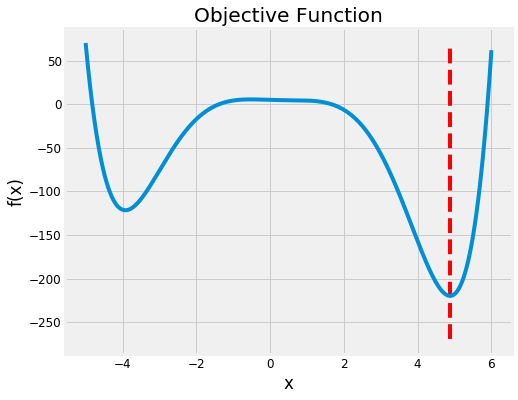

In [513]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [514]:
from hyperopt import hp

# Create the domain space
space = hp.uniform('x', -5, 6)

In [518]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [519]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [520]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

{'x': 4.878481851906148}


In [522]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,iteration,loss,x
0,0,36.210073,5.957885
1,1,-202.384052,4.470885
2,2,-75.519449,3.218963
3,3,5.543552,-0.515859
4,4,35.078011,-4.916832


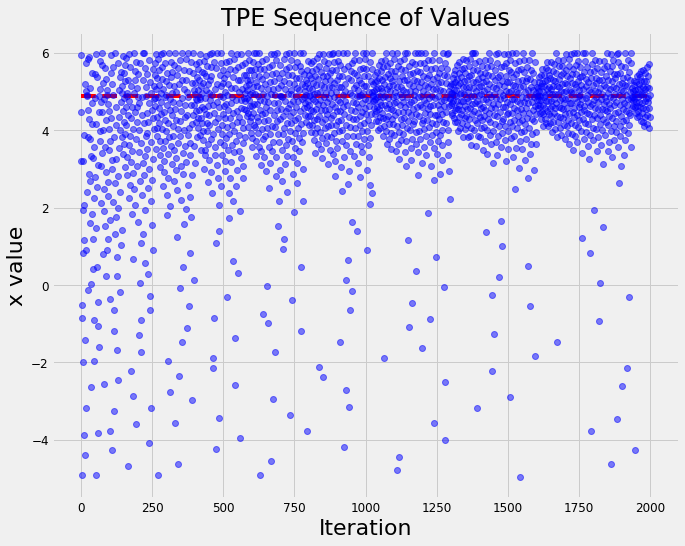

In [523]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

In [524]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,iteration,loss,x
0,0,36.210073,5.957885
1,1,-202.384052,4.470885
2,2,-75.519449,3.218963
3,3,5.543552,-0.515859
4,4,35.078011,-4.916832


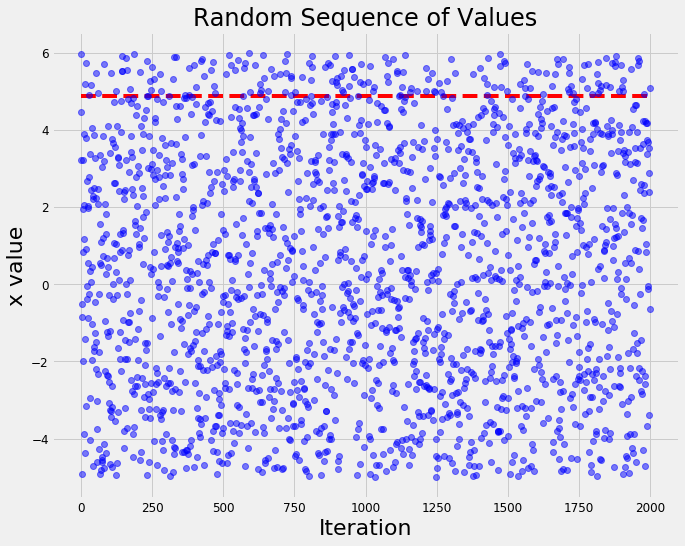

In [525]:
plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

In [535]:
def objective1(params):
    prepare_select_and_predict_pipeline.set_params(**params)
    scores = cross_val_score(prepare_select_and_predict_pipeline,housing,
                             housing_labels,cv = 5,scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

In [545]:
space = {}
space['preparation__num_pipeline__imputer__strategy'] = hp.choice('preparation__num_pipeline__imputer__strategy',
                                                                  ['mean', 'median', 'most_frequent'])